## Assignment 1 - Machine Learning Project
### Project 1: Classify Images of Colon Cancer
##### Group No. 3: Sheikh Abdul Munim (s4076159), Liya Benoy (s4027344)

In [1]:
#importing required libraries
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

In [2]:
#importing the data labels (main+extra)
labels_main = pd.read_csv('Image_classification_data\data_labels_mainData.csv')
labels_extra = pd.read_csv('Image_classification_data\data_labels_extraData.csv')
print(labels_main.head())
print(labels_extra.head())

   InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous
0       22405          1  22405.png   fibroblast         0            0
1       22406          1  22406.png   fibroblast         0            0
2       22407          1  22407.png   fibroblast         0            0
3       22408          1  22408.png   fibroblast         0            0
4       22409          1  22409.png   fibroblast         0            0
   InstanceID  patientID  ImageName  isCancerous
0       12681         61  12681.png            0
1       12682         61  12682.png            0
2       12683         61  12683.png            0
3       12684         61  12684.png            0
4       12685         61  12685.png            0


In [3]:
#navigating to folder containing colon cell histopathology images
image_folder = 'Image_classification_data\patch_images'
images = os.listdir(image_folder)
print(f"Total images: {len(images)}")

Total images: 20280


In [4]:
#checking if there are extra images in images folder that are not given in data labels
images_set = set(images)
csv_images_set = set(labels_main['ImageName'].astype(str))  #no '.png' added!
print("Images in CSV but missing from folder:", csv_images_set - images_set)
print("Images in folder but missing from CSV:", images_set - csv_images_set)
#use only images that are listed in the CSV file
images_filtered = [img for img in images if img in csv_images_set]

Images in CSV but missing from folder: set()
Images in folder but missing from CSV: {'21833.png', '20652.png', '10483.png', '6204.png', '14806.png', '22058.png', '5097.png', '19408.png', '10399.png', '12738.png', '7339.png', '12699.png', '3703.png', '10564.png', '12645.png', '5233.png', '16395.png', '14431.png', '6086.png', '19560.png', '9648.png', '9688.png', '20856.png', '15323.png', '5295.png', '7291.png', '14279.png', '11180.png', '7631.png', '11077.png', '15404.png', '5429.png', '9577.png', '16027.png', '12925.png', '2380.png', '17986.png', '18010.png', '15415.png', '12750.png', '5026.png', '21831.png', '9605.png', '16012.png', '1642.png', '12453.png', '11161.png', '19331.png', '2419.png', '1962.png', '5775.png', '14267.png', '12403.png', '5938.png', '2774.png', '21793.png', '5406.png', '21434.png', '12605.png', '6292.png', '19701.png', '14619.png', '3749.png', '20608.png', '1720.png', '17830.png', '20791.png', '17862.png', '12429.png', '16266.png', '14367.png', '5682.png', '21990

In [5]:
#defining function to load images
def load_images(image_folder, image_list):
    """Returns a dictionary mapping image names to PIL image objects."""
    images = {}
    for img_name in image_list:
        img_path = os.path.join(image_folder, img_name)
        try:
            with Image.open(img_path) as img:
                images[img_name] = img.copy()  # Copy to keep it after closing
        except Exception as e:
            print(f"Error loading {img_name}: {e}")
    return images
#loading the images
image_objects = load_images(image_folder, labels_main['ImageName'])
#adding a new column 'Image' to labels_main
labels_main['Image'] = labels_main['ImageName'].map(image_objects)
print(labels_main.head())

   InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous  \
0       22405          1  22405.png   fibroblast         0            0   
1       22406          1  22406.png   fibroblast         0            0   
2       22407          1  22407.png   fibroblast         0            0   
3       22408          1  22408.png   fibroblast         0            0   
4       22409          1  22409.png   fibroblast         0            0   

                                               Image  
0  <PIL.Image.Image image mode=RGB size=27x27 at ...  
1  <PIL.Image.Image image mode=RGB size=27x27 at ...  
2  <PIL.Image.Image image mode=RGB size=27x27 at ...  
3  <PIL.Image.Image image mode=RGB size=27x27 at ...  
4  <PIL.Image.Image image mode=RGB size=27x27 at ...  


In [6]:
#fetching a single sample (e.g., for index 0)
index = 0
sample = labels_main.iloc[index]
#extracting the image, cancer label, and cell type for this sample
img = sample['Image']
cancer_label = sample['isCancerous']  # Assuming this is the correct column name
cell_type = sample['cellTypeName']  # Assuming this is the correct column name
#printing the results
if img:
    print(f"Image Size: {img.size}, Cancer Label: {cancer_label}, Cell Type: {cell_type}")
else:
    print("Error: Image not found.")

Image Size: (27, 27), Cancer Label: 0, Cell Type: fibroblast


### Exploratory Data Analysis (EDA)

In [7]:
#fetching the dimensions of the data
print(labels_main.shape)
print(labels_main.describe())

(9896, 7)
         InstanceID    patientID     cellType  isCancerous
count   9896.000000  9896.000000  9896.000000  9896.000000
mean   10193.880154    29.762025     1.501516     0.412187
std     6652.912660    17.486553     0.954867     0.492253
min        1.000000     1.000000     0.000000     0.000000
25%     4135.750000    14.000000     1.000000     0.000000
50%     9279.500000    26.000000     2.000000     0.000000
75%    16821.250000    47.000000     2.000000     1.000000
max    22444.000000    60.000000     3.000000     1.000000


C:\Users\Munim\AppData\Local\Temp\ipykernel_3788\3054737391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=labels_main, x='isCancerous', palette='viridis')


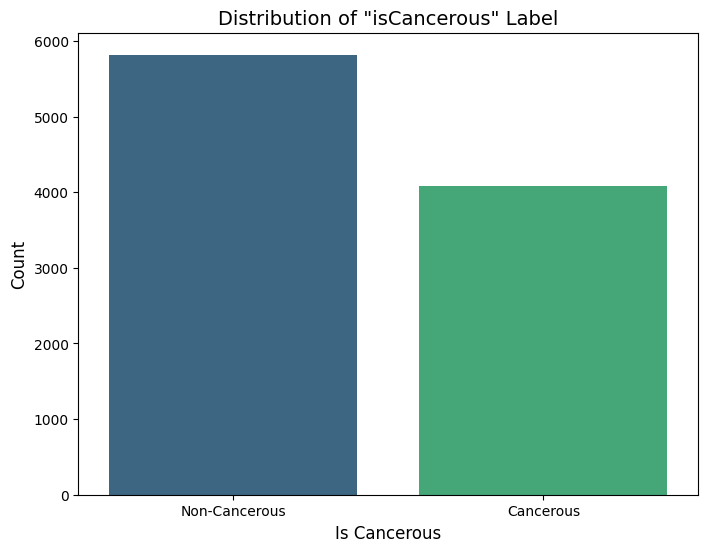

In [8]:
# Plotting the distribution of the 'inCancerous' label
plt.figure(figsize=(8, 6))
sns.countplot(data=labels_main, x='isCancerous', palette='viridis')
# Adding titles and labels
plt.title('Distribution of "isCancerous" Label', fontsize=14)
plt.xlabel('Is Cancerous', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Non-Cancerous', 'Cancerous'])  # Adjust according to your label values
# Show the plot
plt.show()

C:\Users\Munim\AppData\Local\Temp\ipykernel_3788\3792667902.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=labels_main, x='cellTypeName', palette='Set2')


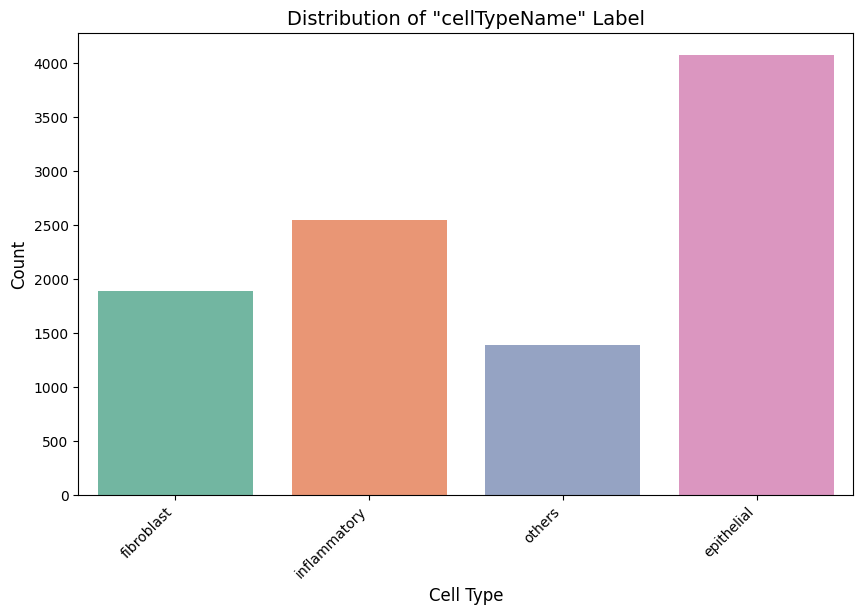

In [9]:
#plotting the distribution of the 'cellTypeName' label
plt.figure(figsize=(10, 6))
sns.countplot(data=labels_main, x='cellTypeName', palette='Set2')
#adding titles and labels
plt.title('Distribution of "cellTypeName" Label', fontsize=14)
plt.xlabel('Cell Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()

In [10]:
#checking for missing values in the entire DataFrame
missing_values = labels_main.isnull().sum()
#displaying the columns with missing values
print("Missing values in each column:")
print(missing_values)
#optionally, you can filter columns with missing values only
missing_columns = missing_values[missing_values > 0]
print("\nColumns with missing values:")
print(missing_columns)


Missing values in each column:
InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
Image           0
dtype: int64

Columns with missing values:
Series([], dtype: int64)


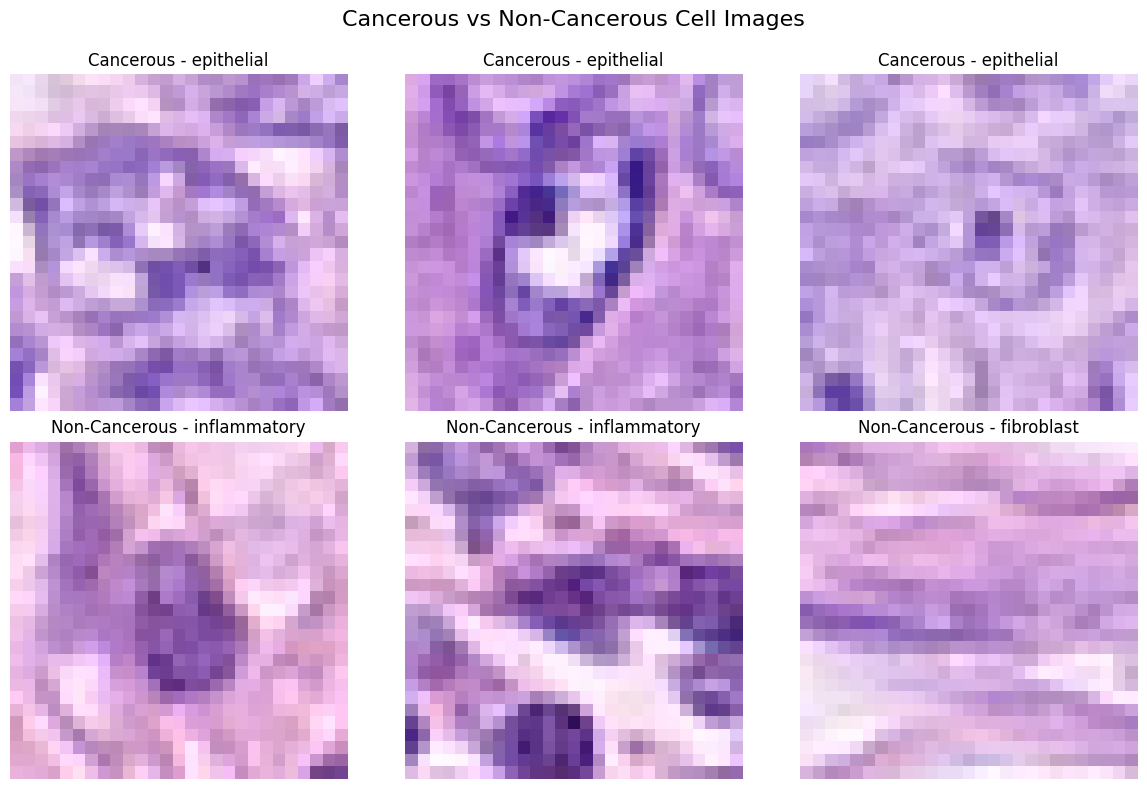

In [11]:
#filter the data based on the 'inCancerous' label (0 for non-cancerous, 1 for cancerous)
cancerous_cells = labels_main[labels_main['isCancerous'] == 1]
non_cancerous_cells = labels_main[labels_main['isCancerous'] == 0]
#sample some images for display (let's display 3 cancerous and 3 non-cancerous)
sample_cancerous_images = cancerous_cells.sample(3)
sample_non_cancerous_images = non_cancerous_cells.sample(3)
#plotting the images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
#display cancerous images
for i, (idx, row) in enumerate(sample_cancerous_images.iterrows()):
    ax = axes[0, i]
    img = row['Image']
    ax.imshow(img)
    ax.set_title(f"Cancerous - {row['cellTypeName']}")
    ax.axis('off')
#display non-cancerous images
for i, (idx, row) in enumerate(sample_non_cancerous_images.iterrows()):
    ax = axes[1, i]
    img = row['Image']
    ax.imshow(img)
    ax.set_title(f"Non-Cancerous - {row['cellTypeName']}")
    ax.axis('off')
#adding a main title
plt.suptitle('Cancerous vs Non-Cancerous Cell Images', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

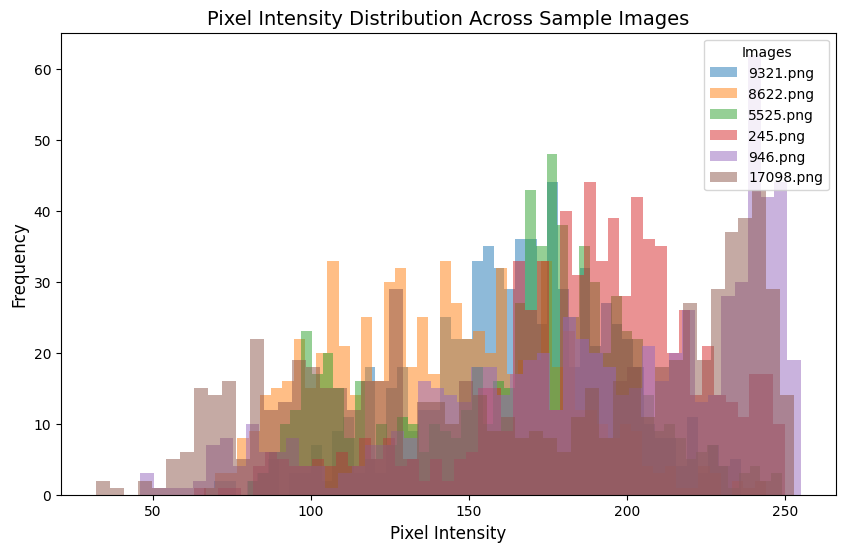

In [12]:
#function to calculate pixel intensity distribution for grayscale images
def plot_pixel_intensity_distribution(images, title="Pixel Intensity Distribution"):
    plt.figure(figsize=(10, 6))
    for idx, (img_name, img) in enumerate(images.items()):
        #convert image to grayscale
        img_gray = img.convert("L")  # Convert image to grayscale
        img_array = np.array(img_gray)  # Convert image to numpy array
        #flatten the image array to 1D and plot the histogram of pixel intensities
        plt.hist(img_array.flatten(), bins=50, alpha=0.5, label=img_name) 
    #adding title and labels
    plt.title(title, fontsize=14)
    plt.xlabel('Pixel Intensity', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(title="Images", loc='upper right')
    plt.show()
#plotting the pixel intensity distribution for a few sample images (for cancerous and non-cancerous images)
sample_cancerous_images = cancerous_cells.sample(3)
sample_non_cancerous_images = non_cancerous_cells.sample(3)
#combine the selected images into one dictionary (for visualization)
sample_images = {}
for idx, row in sample_cancerous_images.iterrows():
    sample_images[row['ImageName']] = row['Image']
for idx, row in sample_non_cancerous_images.iterrows():
    sample_images[row['ImageName']] = row['Image']
#plotting the intensity distribution
plot_pixel_intensity_distribution(sample_images, title="Pixel Intensity Distribution Across Sample Images")

C:\Users\Munim\AppData\Local\Temp\ipykernel_3788\3073188320.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=patient_distribution.index, y=patient_distribution.values, palette="Set2")


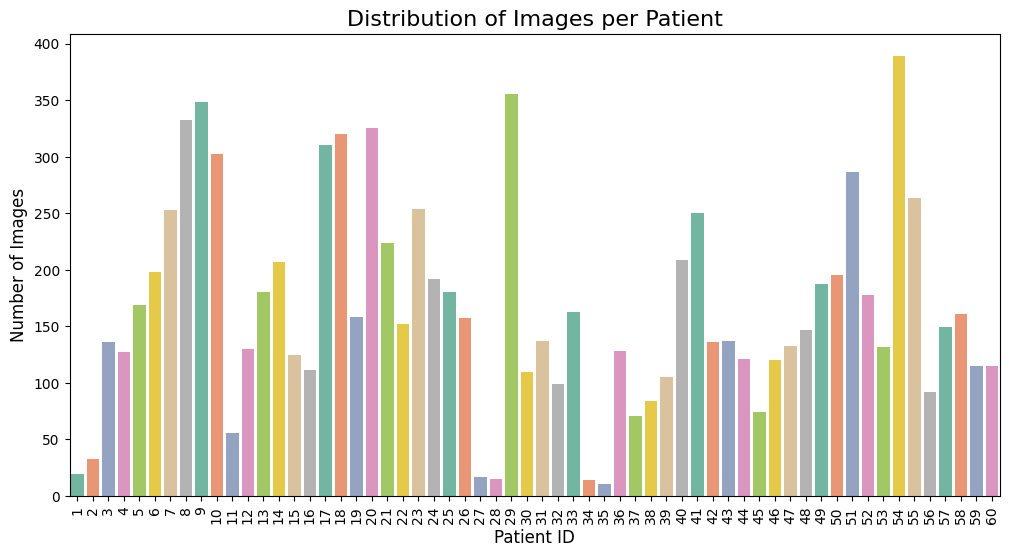

In [13]:
#grouping the data by PatientID and counting the number of images per patient
patient_distribution = labels_main['patientID'].value_counts()
#plotting the patient distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=patient_distribution.index, y=patient_distribution.values, palette="Set2")
#adding title and labels
plt.title('Distribution of Images per Patient', fontsize=16)
plt.xlabel('Patient ID', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

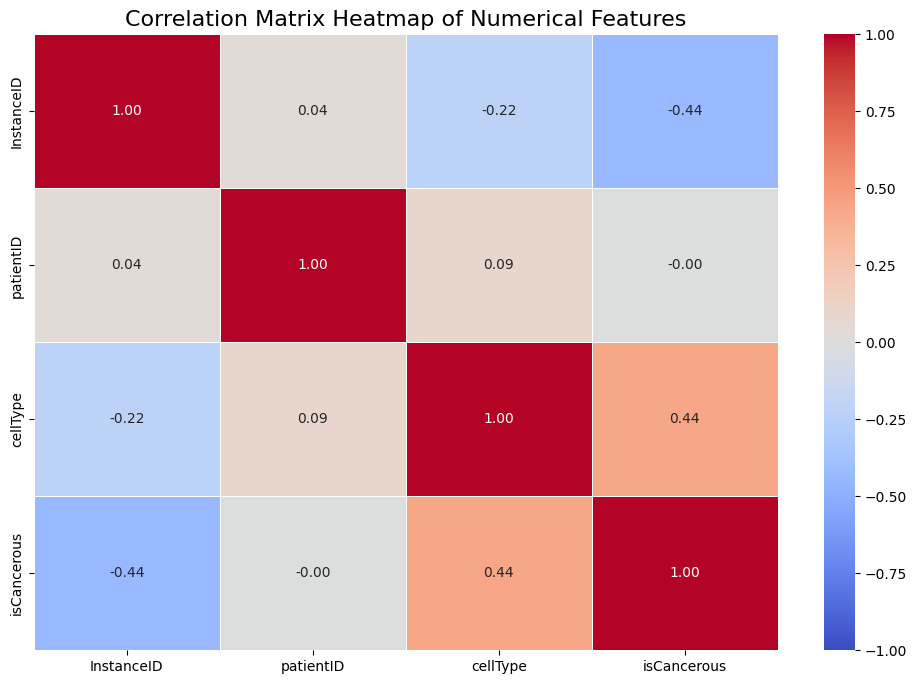

In [14]:
#select only numerical columns
numerical_features = labels_main.select_dtypes(include=['float64', 'int64'])
#calculate the correlation matrix
corr_matrix = numerical_features.corr()
#plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap of Numerical Features', fontsize=16)
plt.show()

In [15]:
#function to classify images as too bright or too dark based on average pixel intensity
def check_image_brightness(images, bright_threshold=200, dark_threshold=50):
    too_bright = []
    too_dark = []  
    for img_name, img in images.items():
        # Convert the image to grayscale
        img_gray = img.convert("L")
        img_array = np.array(img_gray)  # Convert image to numpy array
        #calculate the average pixel intensity
        avg_intensity = img_array.mean()
        #classify image as too bright or too dark
        if avg_intensity > bright_threshold:
            too_bright.append(img_name)
        elif avg_intensity < dark_threshold:
            too_dark.append(img_name)
    return too_bright, too_dark
#check the brightness of the images
too_bright_images, too_dark_images = check_image_brightness(image_objects)
#display the results
print("Too Bright Images:", too_bright_images)
print("Too Dark Images:", too_dark_images)

Too Bright Images: ['22408.png', '22409.png', '22423.png', '19036.png', '19043.png', '19045.png', '19049.png', '19050.png', '19062.png', '19066.png', '18945.png', '18653.png', '132.png', '133.png', '135.png', '153.png', '156.png', '158.png', '161.png', '162.png', '163.png', '164.png', '165.png', '167.png', '168.png', '172.png', '173.png', '175.png', '176.png', '177.png', '178.png', '179.png', '180.png', '181.png', '183.png', '184.png', '187.png', '190.png', '191.png', '192.png', '193.png', '194.png', '195.png', '196.png', '197.png', '198.png', '199.png', '200.png', '201.png', '203.png', '204.png', '205.png', '207.png', '212.png', '213.png', '215.png', '220.png', '221.png', '222.png', '223.png', '227.png', '228.png', '229.png', '230.png', '232.png', '233.png', '234.png', '235.png', '241.png', '242.png', '243.png', '253.png', '254.png', '256.png', '257.png', '260.png', '262.png', '264.png', '270.png', '271.png', '273.png', '274.png', '275.png', '4087.png', '4089.png', '4092.png', '4096.p

### Data Pre-processing

In [16]:

"""    
The following code loads the images, resizes them to 27x27 pixels, normalizes the pixel values, and prepares the labels for CNN training.
The code also combines the labels from the main and extra detasets, however if you do not want to use the extra dataset, you can comment out the lines that load and concate the extra dataset.
The code also handles exceptions while loading images and prints the final shapes of the image dataset and labels.

"""




import numpy as np
from PIL import Image

#list of arrays

X = []
y_isCancerous = []
y_cellType = []

#Combine labels

labels_combined = pd.concat([labels_main,labels_extra], ignore_index=True)

# Build a dictionary for fast lookup
labels_dict = labels_combined.set_index('ImageName').to_dict('index')

# Load and preprocess images
for img_name in images_filtered:

    try:
        img_path = os.path.join(image_folder, img_name)
        img = Image.open(img_path)
        img = img.resize((27, 27))  # Make sure it's 27x27
        img_array = np.array(img)
        
        # Normalize pixel values (0–1)
        img_array = img_array / 255.0

        X.append(img_array)
        
        # Fetch labels
        label_info = labels_dict[img_name]
        y_isCancerous.append(label_info['isCancerous'])
        y_cellType.append(label_info['cellType'])  # This will be used later

    except Exception as e:
        print(f"Error processing {img_name}:{e}")

X = np.array(X)
y_isCancerous = np.array(y_isCancerous)
y_cellType = np.array(y_cellType)

print(f"Final image dataset shape: {X.shape}")
print(f"Labels shape (isCancerous): {y_isCancerous.shape}")
print(f"Labels shape (cellType): {y_cellType.shape}")

Final image dataset shape: (9896, 27, 27, 3)
Labels shape (isCancerous): (9896,)
Labels shape (cellType): (9896,)


In [17]:
# Encoding the labels for cell types
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


# Encode cellType labels into integers
le = LabelEncoder()
y_cellType_encoded = le.fit_transform(y_cellType)

# One-hot encode for CNN multi-class classification
y_cellType_encoded = to_categorical(y_cellType_encoded)

print(f"Cell type classes: {le.classes_}")


Num GPUs Available: 1
Cell type classes: [0. 1. 2. 3.]


In [18]:
#Train-Vlidation-Test Split

from sklearn.model_selection import train_test_split

# Split for Task 1 (isCancerous)
X_train_task1, X_test_task1, y_train_task1, y_test_task1 = train_test_split(X, y_isCancerous, test_size=0.2, random_state=42)

# Split for Task 2 (cellType)
X_train_task2, X_test_task2, y_train_task2, y_test_task2 = train_test_split(X, y_cellType_encoded, test_size=0.2, random_state=42)

print(f"Task 1 Train set size: {X_train_task1.shape}")
print(f"Task 2 Train set size: {X_train_task2.shape}")


Task 1 Train set size: (7916, 27, 27, 3)
Task 2 Train set size: (7916, 27, 27, 3)


### Building Baseline Model: 

In [19]:
# Binary Classification Model for Task 1 (isCancerous)

"""Input shape: 27x27x3 (for RGB images)
Output shape: 1 (binary classification)"""

#Model Architecture

import tensorflow as tf
from tensorflow.keras import layers, models

# Define CNN model
cnn_task1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(27, 27, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 1 neuron for binary output
])

# Compile the model
cnn_task1.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Model summary
cnn_task1.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

In [20]:
#Train the Model
# Training
history_task1 = cnn_task1.fit(X_train_task1, y_train_task1,
                              epochs=30,
                              batch_size=32,
                              validation_split=0.2)  # 20% of train set used for validation



Epoch 1/30
198/198 [==============================] - 6s 8ms/step - loss: 0.4333 - accuracy: 0.7967 - val_loss: 0.3214 - val_accuracy: 0.8624
Epoch 2/30
198/198 [==============================] - 1s 6ms/step - loss: 0.3122 - accuracy: 0.8691 - val_loss: 0.4243 - val_accuracy: 0.8131
Epoch 3/30
198/198 [==============================] - 1s 6ms/step - loss: 0.2862 - accuracy: 0.8804 - val_loss: 0.3012 - val_accuracy: 0.8763
Epoch 4/30
198/198 [==============================] - 1s 6ms/step - loss: 0.2972 - accuracy: 0.8748 - val_loss: 0.3115 - val_accuracy: 0.8756
Epoch 5/30
198/198 [==============================] - 1s 6ms/step - loss: 0.2604 - accuracy: 0.8929 - val_loss: 0.3328 - val_accuracy: 0.8674
Epoch 6/30
198/198 [==============================] - 1s 7ms/step - loss: 0.2539 - accuracy: 0.8958 - val_loss: 0.2957 - val_accuracy: 0.8832
Epoch 7/30
198/198 [==============================] - 1s 6ms/step - loss: 0.2485 - accuracy: 0.9003 - val_loss: 0.2998 - val_accuracy: 0.8782
Epoch 

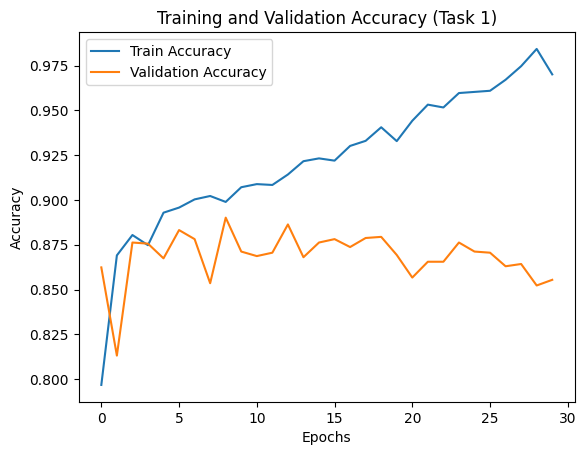

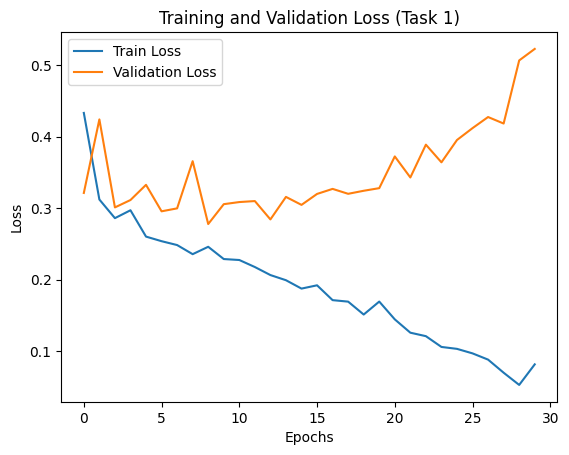

In [21]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history_task1.history['accuracy'], label='Train Accuracy')
plt.plot(history_task1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Task 1)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_task1.history['loss'], label='Train Loss')
plt.plot(history_task1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Task 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [22]:
# Evaluate
test_loss, test_accuracy = cnn_task1.evaluate(X_test_task1, y_test_task1)
print(f"Test Accuracy (Task 1 - isCancerous): {test_accuracy:.4f}")


62/62 [==============================] - 0s 6ms/step - loss: 0.5119 - accuracy: 0.8707
Test Accuracy (Task 1 - isCancerous): 0.8707


In [23]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict
y_pred_task1 = (cnn_task1.predict(X_test_task1) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test_task1, y_pred_task1)
print("Confusion Matrix:\n", cm)

# Classification report
print(classification_report(y_test_task1, y_pred_task1))


62/62 [==============================] - 0s 4ms/step
Confusion Matrix:
 [[976 210]
 [ 46 748]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1186
           1       0.78      0.94      0.85       794

    accuracy                           0.87      1980
   macro avg       0.87      0.88      0.87      1980
weighted avg       0.89      0.87      0.87      1980

